In [ ]:
#install dependencies
!pip install diffusers mediapy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 19.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = dtype)
pipe = pipe.to(device)
print(pipe)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "stabilityai/stable-diffusion-2-1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [ ]:
 print(torch.cuda.is_available())

True


In [ ]:
%pip install moviepy --upgrade
%pip install pydub


In [ ]:
import json

# Path to the JSON file
file_path = 'playlist_info.json'

def load_json_as_dict(file_path):
  with open(file_path, 'r') as file:
      data = json.load(file)
      song_dict = {item['song_name']: item for item in data}
      return song_dict

# Load the data
song_data_dict = load_json_as_dict(file_path)

with open('music_features_clap.json', 'r') as file:
    music_feature_data = json.load(file)

In [ ]:
import re
from moviepy.editor import ImageClip, concatenate_videoclips, AudioFileClip
import os
import torchvision, time
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import random
import numpy as np
from pydub import AudioSegment
def create_directory_if_not_exists(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

def keyword_genration(line):
  return f"{line['genre']} and {line['emotion']}"

def calculate_duration(timestamp, total_duration):
  durations = [timestamp[0]]
  for i in range(len(timestamp)-1):
    durations.append(timestamp[i+1]-timestamp[i])
  durations.append(total_duration-timestamp[-1])
  return durations

def get_timestamps(data):
    timestamps = {}
    for key, value in data.items():
        timestamps[key] = [float(song['start_time']) /1000.0 for song in value]
    return timestamps

def create_video_with_fades(song_name, images, timestamp, output_dir, output_dir_slient, fade_duration=0.1):
    create_directory_if_not_exists(output_dir)
    create_directory_if_not_exists(output_dir_slient)
    song = song_data_dict[song_name]
    total_duration = song["duration_ms"] / 1000
    durations = calculate_duration(timestamp, total_duration)
    clips = []
    for img, duration in zip(images, durations):
        img = np.array(img)
        clip = ImageClip(img, duration=duration)
        clip = clip.crossfadein(fade_duration)
        clips.append(clip)

    final_clip = concatenate_videoclips(clips[1:], method="compose", padding=-fade_duration)
    final_clip.write_videofile(f"{output_dir_slient}/{song_name}.mp4", codec='libx264', fps=1)


    final_clip = concatenate_videoclips(clips, method="compose", padding=-fade_duration)
    audio_path = f"music/{song_name}.mp3"
    if audio_path:
        audio_clip = AudioFileClip(audio_path)
        final_clip = final_clip.set_audio(audio_clip)
    final_clip.write_videofile(f"{output_dir}/{song_name}.mp4", codec='libx264', fps=1)

def generate_images(song_name, seed = 1024, with_key_word = False):
  images = []
  song_data = song_data_dict[song_name]

  artist_name = song_data["artist_name"]
  prompt = f"The song {song_name} by {artist_name}"
  images.append(pipe(prompt = prompt,
                num_inference_steps = 50,
                width = 640,
                height = 480,
                generator = torch.Generator(device).manual_seed(seed),
                guidance_scale = 12.5).images[0])
  lines = music_feature_data[song_name]
  for line in lines:
    prompt = line['lyric']
    if with_key_word:
      keyword = keyword_genration(line)
      prompt += f" in a {keyword} style"
    images.append(pipe(prompt = prompt,
                  num_inference_steps = 50,
                  width = 640,
                  height = 480,
                  generator = torch.Generator(device).manual_seed(seed),
                  guidance_scale = 12.5).images[0])
  return images

def save_test_images_and_audio(images, images_with_keyword, timestamps, song_name, index):
    save_dir_keyword_image = "test_images_keyword/test_image"
    save_dir_image = "test_images/test_image"
    save_dir_audio_clips = "test_audio/test_audio"
    create_directory_if_not_exists("test_images_keyword")
    create_directory_if_not_exists("test_images")
    create_directory_if_not_exists("test_audio")
    images = images[1:]
    random_ints = random.sample(range(0, len(images)), 2)

    for i in random_ints:
      plt.imshow(images[i])
      plt.savefig(save_dir_image + str(index) + ".pdf")
      plt.imshow(images_with_keyword[i])
      plt.savefig(save_dir_keyword_image + str(index) + ".pdf")
      audio_path = f"music/{song_name}.mp3"
      audio = AudioSegment.from_file(audio_path)
      start_time = timestamps[i]*1000
      end_time = timestamps[i+1]*1000 if i != len(timestamps)-1 else song_data_dict[song_name]["duration_ms"]
      extract = audio[start_time:end_time]
      extract.export(save_dir_audio_clips + str(index) + ".mp3", format="mp3")
      index += 1
    return index

t:  79%|███████▉  | 139/176 [17:48<00:01, 20.22it/s, now=None]

creating videos
Moviepy - Building video video_keyword/Beautiful Things.mp4.
Moviepy - Writing video video_keyword/Beautiful Things.mp4




t:  79%|███████▉  | 139/176 [17:53<00:01, 20.22it/s, now=None]

Moviepy - Done !
Moviepy - video ready video_keyword/Beautiful Things.mp4
Moviepy - Building video video_keyword_slient/Beautiful Things.mp4.
MoviePy - Writing audio in Beautiful ThingsTEMP_MPY_wvf_snd.mp3



t:  79%|███████▉  | 139/176 [18:00<00:01, 20.22it/s, now=None]

MoviePy - Done.
Moviepy - Writing video video_keyword_slient/Beautiful Things.mp4




t:  79%|███████▉  | 139/176 [18:06<00:01, 20.22it/s, now=None]

Moviepy - Done !
Moviepy - video ready video_keyword_slient/Beautiful Things.mp4
Moviepy - Building video video_no_keyword/Beautiful Things.mp4.
Moviepy - Writing video video_no_keyword/Beautiful Things.mp4




t:  79%|███████▉  | 139/176 [18:11<00:01, 20.22it/s, now=None]

Moviepy - Done !
Moviepy - video ready video_no_keyword/Beautiful Things.mp4
Moviepy - Building video video_no_keyword_slient/Beautiful Things.mp4.
MoviePy - Writing audio in Beautiful ThingsTEMP_MPY_wvf_snd.mp3



t:  79%|███████▉  | 139/176 [18:19<00:01, 20.22it/s, now=None]

MoviePy - Done.
Moviepy - Writing video video_no_keyword_slient/Beautiful Things.mp4




t:  79%|███████▉  | 139/176 [18:24<00:01, 20.22it/s, now=None]

Moviepy - Done !
Moviepy - video ready video_no_keyword_slient/Beautiful Things.mp4


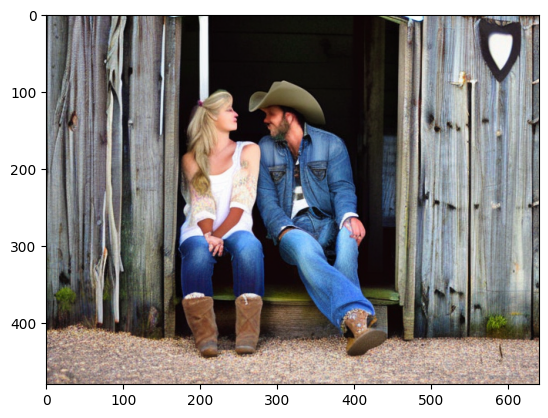

In [ ]:
index = 0
song_name = "Beautiful Things"
timestamps = get_timestamps(music_feature_data)
print("generating images")
image_with_keyword = generate_images(song_name, with_key_word = True)
image_with_out_keyword = generate_images(song_name,with_key_word = False)
print("saving images for testing")
index = save_test_images_and_audio(image_with_out_keyword, image_with_keyword, timestamps[song_name], song_name, index)
print("creating videos")
create_video_with_fades(
    song_name,
    image_with_keyword,
    timestamps[song_name],
    "video_keyword",
    "video_keyword_slient"
    )
create_video_with_fades(
    song_name,
    image_with_out_keyword,
    timestamps[song_name],
    "video_no_keyword",
    "video_no_keyword_slient"
    )

generating images


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

saving images for testing
creating videos
Moviepy - Building video video_keyword_slient/Good Luck, Babe!.mp4.
Moviepy - Writing video video_keyword_slient/Good Luck, Babe!.mp4



Moviepy - Done !
Moviepy - video ready video_keyword_slient/Good Luck, Babe!.mp4
Moviepy - Building video video_keyword/Good Luck, Babe!.mp4.
MoviePy - Writing audio in Good Luck, Babe!TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video video_keyword/Good Luck, Babe!.mp4



Moviepy - Done !
Moviepy - video ready video_keyword/Good Luck, Babe!.mp4
Moviepy - Building video video_no_keyword_slient/Good Luck, Babe!.mp4.
Moviepy - Writing video video_no_keyword_slient/Good Luck, Babe!.mp4



Moviepy - Done !
Moviepy - video ready video_no_keyword_slient/Good Luck, Babe!.mp4
Moviepy - Building video video_no_keyword/Good Luck, Babe!.mp4.
MoviePy - Writing audio in Good Luck, Babe!TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video video_no_keyword/Good Luck, Babe!.mp4



Moviepy - Done !
Moviepy - video ready video_no_keyword/Good Luck, Babe!.mp4
generating images


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

saving images for testing
creating videos
Moviepy - Building video video_keyword_slient/i like the way you kiss me.mp4.
Moviepy - Writing video video_keyword_slient/i like the way you kiss me.mp4



Moviepy - Done !
Moviepy - video ready video_keyword_slient/i like the way you kiss me.mp4
Moviepy - Building video video_keyword/i like the way you kiss me.mp4.
MoviePy - Writing audio in i like the way you kiss meTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video video_keyword/i like the way you kiss me.mp4



Moviepy - Done !
Moviepy - video ready video_keyword/i like the way you kiss me.mp4
Moviepy - Building video video_no_keyword_slient/i like the way you kiss me.mp4.
Moviepy - Writing video video_no_keyword_slient/i like the way you kiss me.mp4



Moviepy - Done !
Moviepy - video ready video_no_keyword_slient/i like the way you kiss me.mp4
Moviepy - Building video video_no_keyword/i like the way you kiss me.mp4.
MoviePy - Writing audio in i like the way you kiss meTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video video_no_keyword/i like the way you kiss me.mp4



Moviepy - Done !
Moviepy - video ready video_no_keyword/i like the way you kiss me.mp4


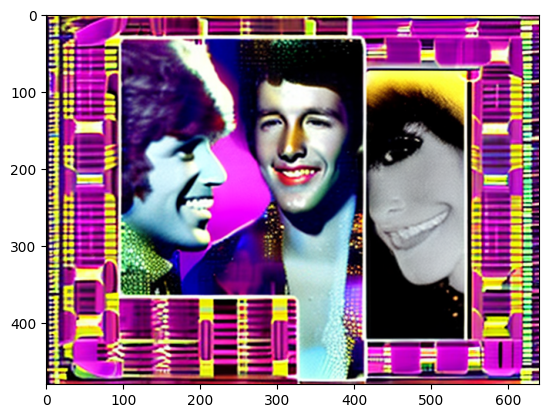

In [ ]:
index = 0
# song_names = ["Beautiful Things", "Espresso", "Good Luck, Babe!", "Too Sweet", "i like the way you kiss me"]
song_names = ["Good Luck, Babe!", "i like the way you kiss me"]
timestamps = get_timestamps(music_feature_data)
for song_name in song_names:
  print("generating images")
  image_with_keyword = generate_images(song_name, with_key_word = True)
  image_with_out_keyword = generate_images(song_name,with_key_word = False)
  print("saving images for testing")
  index = save_test_images_and_audio(image_with_out_keyword, image_with_keyword, timestamps[song_name], song_name, index)
  print("creating videos")
  create_video_with_fades(
      song_name,
      image_with_keyword,
      timestamps[song_name],
      "video_keyword",
      "video_keyword_slient"
      )
  create_video_with_fades(
      song_name,
      image_with_out_keyword,
      timestamps[song_name],
      "video_no_keyword",
      "video_no_keyword_slient"
      )

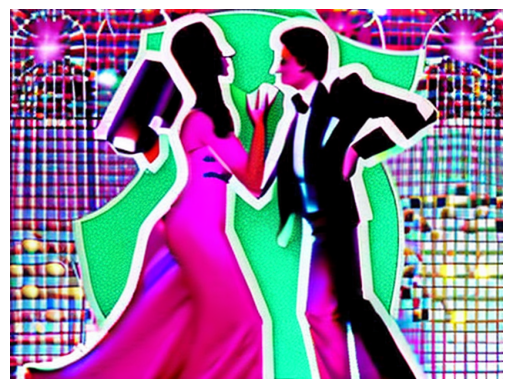

In [ ]:
for i in range(3):
  plt.imshow(image_with_keyword[i])
  plt.axis('off')
  plt.savefig("images" + str(i) + ".pdf")

In [ ]:
!zip -r test_images.zip test_images
!zip -r test_images_keyword.zip test_images_keyword
!zip -r test_audio.zip test_audio
!zip -r video_keyword.zip video_keyword
!zip -r video_keyword_slient.zip video_keyword_slient
!zip -r video_no_keyword.zip video_no_keyword
!zip -r video_no_keyword_slient.zip video_no_keyword_slient

  adding: test_images/ (stored 0%)
  adding: test_images/test_image6.pdf (deflated 1%)
  adding: test_images/test_image7.pdf (deflated 1%)
  adding: test_images/test_image1.pdf (deflated 1%)
  adding: test_images/test_image3.pdf (deflated 1%)
  adding: test_images/test_image8.pdf (deflated 1%)
  adding: test_images/test_image4.pdf (deflated 1%)
  adding: test_images/test_image5.pdf (deflated 1%)
  adding: test_images/test_image9.pdf (deflated 1%)
  adding: test_images/test_image2.pdf (deflated 1%)
  adding: test_images/test_image0.pdf (deflated 1%)
  adding: test_images_keyword/ (stored 0%)
  adding: test_images_keyword/test_image6.pdf (deflated 1%)
  adding: test_images_keyword/test_image7.pdf (deflated 1%)
  adding: test_images_keyword/test_image1.pdf (deflated 1%)
  adding: test_images_keyword/test_image3.pdf (deflated 1%)
  adding: test_images_keyword/test_image8.pdf (deflated 1%)
  adding: test_images_keyword/test_image4.pdf (deflated 1%)
  adding: test_images_keyword/test_image5.

In [ ]:
from google.colab import files
files.download("test_images.zip")
files.download("test_images_keyword.zip")
files.download("test_audio.zip")
files.download("video_keyword.zip")
files.download("video_keyword_slient.zip")
files.download("video_no_keyword.zip")
files.download("video_no_keyword_slient.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from moviepy.editor import VideoFileClip
import random

def random_timestamps(total_duration, timestamps):
    random_times = random.sample(timestamps, 1)
    if random_times[0] +30 > total_duration:
        random_times = random_timestamps(total_duration, timestamps)
    return random_times


song_names = ["Beautiful Things", "Espresso", "Good Luck, Babe!", "Too Sweet", "i like the way you kiss me"]
timestamps = get_timestamps(music_feature_data)
video_keyword_path = "video_keyword/"
video_no_keyword_path = "video_no_keyword/"
output_audio = "video_audio/"
output_video_path_keyword = "video_keyword_no_audio/"
output_video_path_no_keyword = "video_no_keyword_no_audio/"
create_directory_if_not_exists("video_audio")
create_directory_if_not_exists("video_keyword_no_audio")
create_directory_if_not_exists("video_no_keyword_no_audio")

index = 0
for song_name in song_names:
    song = song_data_dict[song_name]
    total_duration = song["duration_ms"] / 1000
    video_keyword = VideoFileClip(f"{video_keyword_path}{song_name}.mp4")
    video_no_keyword = VideoFileClip(f"{video_no_keyword_path}{song_name}.mp4")
    random_timestamp = random_timestamps(total_duration, timestamps[song_name])[0]
    clip = video_keyword.subclip(random_timestamp, random_timestamp+30)
    video_without_audio = clip.without_audio()
    video_without_audio.write_videofile(f"{output_video_path_keyword}test_video_{index}.mp4", codec='libx264')
    clip = video_no_keyword.subclip(random_timestamp, random_timestamp+30)
    video_without_audio = clip.without_audio()
    video_without_audio.write_videofile(f"{output_video_path_no_keyword}test_video_{index}.mp4", codec='libx264')
    audio_path = f"music/{song_name}.mp3"
    audio = AudioSegment.from_file(audio_path)
    start_time =random_timestamp*1000
    end_time = (random_timestamp+30)*1000
    extract = audio[start_time:end_time]
    extract.export(f"{output_audio}test_audio_{index}.mp3", format="mp3")
    index += 1


Moviepy - Building video video_keyword_no_audio/test_video_0.mp4.
Moviepy - Writing video video_keyword_no_audio/test_video_0.mp4



Moviepy - Done !
Moviepy - video ready video_keyword_no_audio/test_video_0.mp4
Moviepy - Building video video_no_keyword_no_audio/test_video_0.mp4.
Moviepy - Writing video video_no_keyword_no_audio/test_video_0.mp4



Moviepy - Done !
Moviepy - video ready video_no_keyword_no_audio/test_video_0.mp4
Moviepy - Building video video_keyword_no_audio/test_video_1.mp4.
Moviepy - Writing video video_keyword_no_audio/test_video_1.mp4



Moviepy - Done !
Moviepy - video ready video_keyword_no_audio/test_video_1.mp4
Moviepy - Building video video_no_keyword_no_audio/test_video_1.mp4.
Moviepy - Writing video video_no_keyword_no_audio/test_video_1.mp4



Moviepy - Done !
Moviepy - video ready video_no_keyword_no_audio/test_video_1.mp4
Moviepy - Building video video_keyword_no_audio/test_video_2.mp4.
Moviepy - Writing video video_keyword_no_audio/test_video_2.mp4



Moviepy - Done !
Moviepy - video ready video_keyword_no_audio/test_video_2.mp4
Moviepy - Building video video_no_keyword_no_audio/test_video_2.mp4.
Moviepy - Writing video video_no_keyword_no_audio/test_video_2.mp4



Moviepy - Done !
Moviepy - video ready video_no_keyword_no_audio/test_video_2.mp4
Moviepy - Building video video_keyword_no_audio/test_video_3.mp4.
Moviepy - Writing video video_keyword_no_audio/test_video_3.mp4



Moviepy - Done !
Moviepy - video ready video_keyword_no_audio/test_video_3.mp4
Moviepy - Building video video_no_keyword_no_audio/test_video_3.mp4.
Moviepy - Writing video video_no_keyword_no_audio/test_video_3.mp4



Moviepy - Done !
Moviepy - video ready video_no_keyword_no_audio/test_video_3.mp4
Moviepy - Building video video_keyword_no_audio/test_video_4.mp4.
Moviepy - Writing video video_keyword_no_audio/test_video_4.mp4



Moviepy - Done !
Moviepy - video ready video_keyword_no_audio/test_video_4.mp4
Moviepy - Building video video_no_keyword_no_audio/test_video_4.mp4.
Moviepy - Writing video video_no_keyword_no_audio/test_video_4.mp4



Moviepy - Done !
Moviepy - video ready video_no_keyword_no_audio/test_video_4.mp4


In [ ]:
!zip -r video_audio.zip video_audio
!zip -r video_keyword_no_audio.zip video_keyword_no_audio
!zip -r video_no_keyword_no_audio.zip video_no_keyword_no_audio


  adding: video_audio/ (stored 0%)
  adding: video_audio/test_audio_1.mp3 (deflated 1%)
  adding: video_audio/test_audio_3.mp3 (deflated 1%)
  adding: video_audio/test_audio_2.mp3 (deflated 1%)
  adding: video_audio/.ipynb_checkpoints/ (stored 0%)
  adding: video_audio/test_audio_4.mp3 (deflated 1%)
  adding: video_audio/test_audio_0.mp3 (deflated 1%)
  adding: video_keyword_no_audio/ (stored 0%)
  adding: video_keyword_no_audio/test_video_4.mp4 (deflated 0%)
  adding: video_keyword_no_audio/test_video_2.mp4 (deflated 0%)
  adding: video_keyword_no_audio/test_video_0.mp4 (deflated 0%)
  adding: video_keyword_no_audio/test_video_1.mp4 (deflated 0%)
  adding: video_keyword_no_audio/.ipynb_checkpoints/ (stored 0%)
  adding: video_keyword_no_audio/test_video_3.mp4 (deflated 0%)
  adding: video_no_keyword_no_audio/ (stored 0%)
  adding: video_no_keyword_no_audio/test_video_4.mp4 (deflated 0%)
  adding: video_no_keyword_no_audio/test_video_2.mp4 (deflated 0%)
  adding: video_no_keyword_no_au

In [ ]:
from google.colab import files
files.download("video_audio.zip")
files.download("video_keyword_no_audio.zip")
files.download("video_no_keyword_no_audio.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/50 [00:00<?, ?it/s]

The song Beautiful Things by Benson Boone


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

The song Espresso by Sabrina Carpenter


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

The song Good Luck, Babe! by Chappell Roan


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

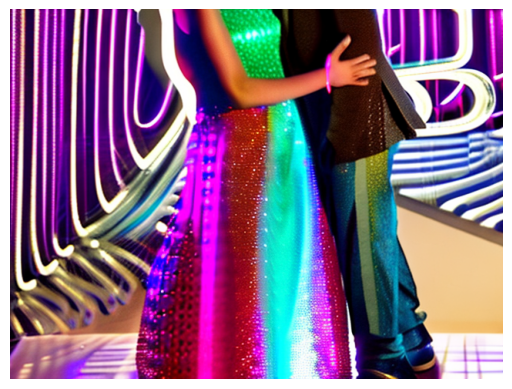

In [ ]:
song_names = ["Beautiful Things", "Espresso", "Good Luck, Babe!"]
seed = 1024
image_dir = "images"
create_directory_if_not_exists(image_dir)
for song_name in song_names:
  prompt = song_name
  images = pipe(prompt = prompt,
                num_inference_steps = 50,
                width = 640,
                height = 480,
                generator = torch.Generator(device).manual_seed(seed),
                guidance_scale = 12.5).images
  plt.axis('off')
  plt.imshow(images[0])
  plt.savefig(f"{image_dir}/{song_name}_song_name_only", bbox_inches='tight')

  prompt = f"The song {song_name} by {song_data_dict[song_name]['artist_name']}"
  print(prompt)
  images = pipe(prompt = prompt,
                num_inference_steps = 50,
                width = 640,
                height = 480,
                generator = torch.Generator(device).manual_seed(seed),
                guidance_scale = 12.5).images
  plt.axis('off')
  plt.imshow(images[0])
  plt.savefig(f"{image_dir}/{song_name}_song_name_and_artist", bbox_inches='tight')

  lines = music_feature_data[song_name]
  prompt = lines[0]['lyric']
  images = pipe(prompt = prompt,
                num_inference_steps = 50,
                width = 640,
                height = 480,
                generator = torch.Generator(device).manual_seed(seed),
                guidance_scale = 12.5).images
  plt.axis('off')
  plt.imshow(images[0])
  plt.savefig(f"{image_dir}/{song_name}_lyric", bbox_inches='tight')

  keyword = keyword_genration(lines[0])
  prompt += f" in a {keyword} style"
  images = pipe(prompt = prompt,
                num_inference_steps = 50,
                width = 640,
                height = 480,
                generator = torch.Generator(device).manual_seed(seed),
                guidance_scale = 12.5).images
  plt.axis('off')
  plt.imshow(images[0])
  plt.savefig(f"{image_dir}/{song_name}_lyric_keyword", bbox_inches='tight')

In [ ]:
from google.colab import files
!zip -r images.zip images
files.download("images.zip")

  adding: images/ (stored 0%)
  adding: images/Beautiful Things_lyric.png (deflated 0%)
  adding: images/Beautiful Things_song_name_only.png (deflated 0%)
  adding: images/Good Luck, Babe!_song_name_and_artist.png (deflated 1%)
  adding: images/Beautiful Things_lyric_keyword.png (deflated 0%)
  adding: images/Espresso_lyric.png (deflated 0%)
  adding: images/Espresso_lyric_keyword.png (deflated 0%)
  adding: images/Good Luck, Babe!_lyric_keyword.png (deflated 0%)
  adding: images/Good Luck, Babe!_lyric.png (deflated 0%)
  adding: images/Good Luck, Babe!_song_name_only.png (deflated 0%)
  adding: images/Espresso_song_name_and_artist.png (deflated 0%)
  adding: images/Espresso_song_name_only.png (deflated 0%)
  adding: images/Beautiful Things_song_name_and_artist.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>